# Task 2-I : Decision Tree I

# Pima indian diabetes analysis

**Note**
* [You can find this data & Information in kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database/version/1)
* class info :
    * 1 : tested positive for diabetes
    * 0 : tested negative for diabetes

In [1]:
###################
## Run this cell ##
###################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data_path = 'https://raw.githubusercontent.com/RayleighKim/Example_datasets/master/pima_diabetes.csv'
db = pd.read_csv(data_path)
db.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Q2. Split the db into training set & validation set & test set

1. x : all columns in db except 'Outcome'
2. y : the column 'Outcome' in db
3. variable names :
    * x_train, y_train
    * x_valid, y_valid
    * x_test, y_test
4. split data into training set and test set first
5. split training set into training set and validation set
6. train : valid : test = 7 : 2 : 1
5. randomstate : 2021
6. shuffle : True

In [2]:
####################
## your code here ##
####################
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(db.drop(['Outcome'], axis=1), db['Outcome'],
                                                    test_size=0.1, random_state=2021, shuffle=True)


x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train,
                                                      test_size=2/9, random_state=2021, shuffle=True)

# Q3. Train 30 decision trees by increasing min_samples_leaf from 1 to 30 one by one

1. Put the trained trees into a list named 'trees'
    * Tree with smallest min_samples_leaf should be the first element of trees list
    * Tree with largest min_samples_leaf should be the last element of trees list

In [3]:
####################
## your code here ##
####################
from sklearn.tree import DecisionTreeClassifier

trees = []
for i in range(30):
    dt = DecisionTreeClassifier(min_samples_leaf=i + 1)
    dt.fit(x_train, y_train)
    trees.append(dt)

print(trees)

[DecisionTreeClassifier(), DecisionTreeClassifier(min_samples_leaf=2), DecisionTreeClassifier(min_samples_leaf=3), DecisionTreeClassifier(min_samples_leaf=4), DecisionTreeClassifier(min_samples_leaf=5), DecisionTreeClassifier(min_samples_leaf=6), DecisionTreeClassifier(min_samples_leaf=7), DecisionTreeClassifier(min_samples_leaf=8), DecisionTreeClassifier(min_samples_leaf=9), DecisionTreeClassifier(min_samples_leaf=10), DecisionTreeClassifier(min_samples_leaf=11), DecisionTreeClassifier(min_samples_leaf=12), DecisionTreeClassifier(min_samples_leaf=13), DecisionTreeClassifier(min_samples_leaf=14), DecisionTreeClassifier(min_samples_leaf=15), DecisionTreeClassifier(min_samples_leaf=16), DecisionTreeClassifier(min_samples_leaf=17), DecisionTreeClassifier(min_samples_leaf=18), DecisionTreeClassifier(min_samples_leaf=19), DecisionTreeClassifier(min_samples_leaf=20), DecisionTreeClassifier(min_samples_leaf=21), DecisionTreeClassifier(min_samples_leaf=22), DecisionTreeClassifier(min_samples_l

# Q4. Evaluate all decision trees on the validation set
* Use accuracy ( unit should be % )
* Put the every accuracy into a list named accs_val
* Print every result.
    * Example
```
min_samples_leaf 1 : 30.01%
min_samples_leaf 2 : 35.45%
...
min_samples_leaf 30 : 61.85%
```

In [5]:
####################
## your code here ##
####################
from sklearn.metrics import accuracy_score


accs_val = []
for i in range(30):
    y_pred_valid = trees[i].predict(x_valid)
    accs = accuracy_score(y_valid, y_pred_valid)
    
    if i < 10:
        print(f"min_samples_leaf {i + 1}  : {accs * 100:.4f}%")
    else:
        print(f"min_samples_leaf {i + 1} : {accs * 100:.4f}%")
    
    accs_val.append(accs)

min_samples_leaf 1  : 66.2338%
min_samples_leaf 2  : 66.2338%
min_samples_leaf 3  : 67.5325%
min_samples_leaf 4  : 68.8312%
min_samples_leaf 5  : 71.4286%
min_samples_leaf 6  : 72.7273%
min_samples_leaf 7  : 74.6753%
min_samples_leaf 8  : 74.6753%
min_samples_leaf 9  : 77.2727%
min_samples_leaf 10  : 76.6234%
min_samples_leaf 11 : 76.6234%
min_samples_leaf 12 : 75.3247%
min_samples_leaf 13 : 76.6234%
min_samples_leaf 14 : 77.2727%
min_samples_leaf 15 : 78.5714%
min_samples_leaf 16 : 78.5714%
min_samples_leaf 17 : 78.5714%
min_samples_leaf 18 : 78.5714%
min_samples_leaf 19 : 78.5714%
min_samples_leaf 20 : 79.2208%
min_samples_leaf 21 : 79.2208%
min_samples_leaf 22 : 77.2727%
min_samples_leaf 23 : 77.9221%
min_samples_leaf 24 : 77.9221%
min_samples_leaf 25 : 77.2727%
min_samples_leaf 26 : 77.2727%
min_samples_leaf 27 : 74.0260%
min_samples_leaf 28 : 74.0260%
min_samples_leaf 29 : 74.0260%
min_samples_leaf 30 : 74.0260%


# Q5. Visualize the result of Q4

* Use line plot
    - x-axis : 1 ~ 30 ( min_samples_leaf which you used)
    - y-axis : accuracy 
& You can import more libraries you want

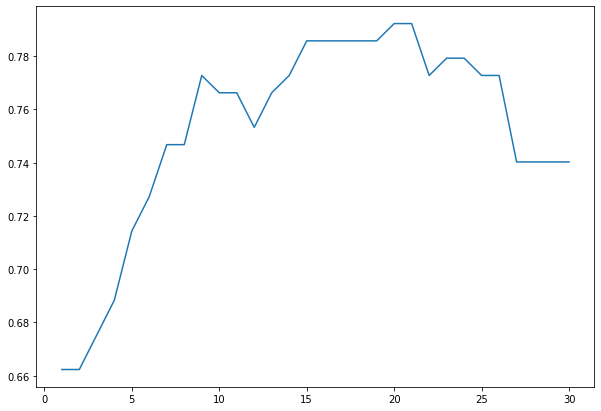

In [6]:
####################
## your code here ##
####################
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.plot([i + 1 for i in range(30)], accs_val)
plt.show()

# Q6. Choos the model with the best performance on the validation set.

* Take the best tree out of the list(trees) and declare a variable with it
* The name of variable is best_tree
* Choose the best tree based on the results of Q4~Q5
* Choose the one with the highest min_samples_leaf, if there are multiple trees with the same top accuracy


In [7]:
####################
## your code here ##
####################
print("A: As we can check from the figures from Q4 and Q5, the trees with best accuracy are tree with min_samples_leaf 20 and 21.")
print("   Among the top trees with highest accuracy, the one with the highest min_samples_leaf is 21.")
print("   Therefore, the chosen model is decision tree with min_samples_leaf 21.\n")

best_tree = trees[21 -1]
print(best_tree)

A: As we can check from the figures from Q4 and Q5, the trees with best accuracy are tree with min_samples_leaf 20 and 21.
   Among the top trees with highest accuracy, the one with the highest min_samples_leaf is 21.
   Therefore, the chosen model is decision tree with min_samples_leaf 21.

DecisionTreeClassifier(min_samples_leaf=21)


# Q7. Quiz using classification report

* Show the classification report of best_tree on test set
* Answer the questions based on classification report
    * Q1 : What does recall for 'positive' class mean?
    * Q2 : What does recall for 'negative' class mean?

In [8]:
#######################################
## Run this cell & Write your answer ##
#######################################
from sklearn.metrics import classification_report

y_pred_test = best_tree.predict(x_test)
print(classification_report(y_test, y_pred_test))

print("Recall is the measure of our model correctly identifying True Positives.\n")

print("A1: According to the classification report, 1 is the 'positive' class and it shows that the recall of the 'positive' class is 56% (0.56).")
print("    Therefore, the meaning of the recall for 'positive' class is that the proportion of what the model predicts to be ture out of what is actually true is 56%.\n")

print("A2: According to the classification report, 0 is the 'negative' class and it shows that the recall of the 'negative' class is 87% (0.87).")
print("    Therefore, the meaning of the recall for 'negative' class is that the proportion of what the model predicts to be ture out of what is actually true is 87%.")

              precision    recall  f1-score   support

           0       0.74      0.87      0.80        45
           1       0.75      0.56      0.64        32

    accuracy                           0.74        77
   macro avg       0.74      0.71      0.72        77
weighted avg       0.74      0.74      0.73        77

Recall is the measure of our model correctly identifying True Positives.

A1: According to the classification report, 1 is the 'positive' class and it shows that the recall of the 'positive' class is 56% (0.56).
    Therefore, the meaning of the recall for 'positive' class is that the proportion of what the model predicts to be ture out of what is actually true is 56%.

A2: According to the classification report, 0 is the 'negative' class and it shows that the recall of the 'negative' class is 87% (0.87).
    Therefore, the meaning of the recall for 'negative' class is that the proportion of what the model predicts to be ture out of what is actually true is 87%.


# Q8. Visualize the feature importances using best_tree

* Use horizontal bar plot
    - x : names of features
    - height : feature importances
    - You can also try (vertical) bar plot
* You can import more libraries you want.

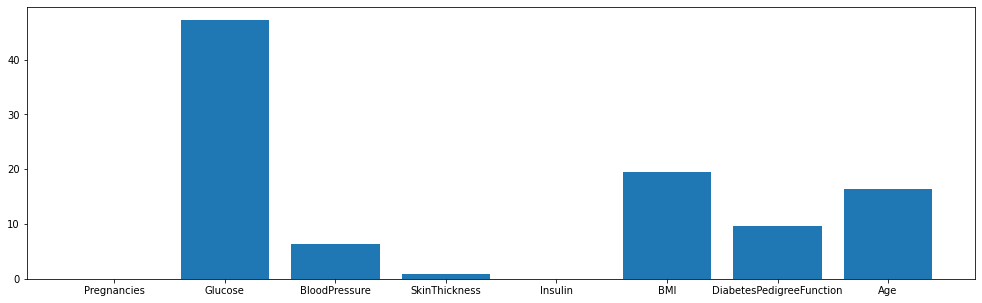

In [9]:
####################
## Your code here ##
####################

feature = x_train.columns
importance = best_tree.feature_importances_

plt.figure(figsize=(17, 5))
plt.bar([x for x in feature], importance * 100)
plt.show()

# Q9. Visualize the best_tree

1. Visualize the tree
    * fontsize : 15
    * filled : True
    * feature names & class names must be specified
2. Interpret the results
    * Use the three most important rules.
    * Interpretation using proportions of classes should be included

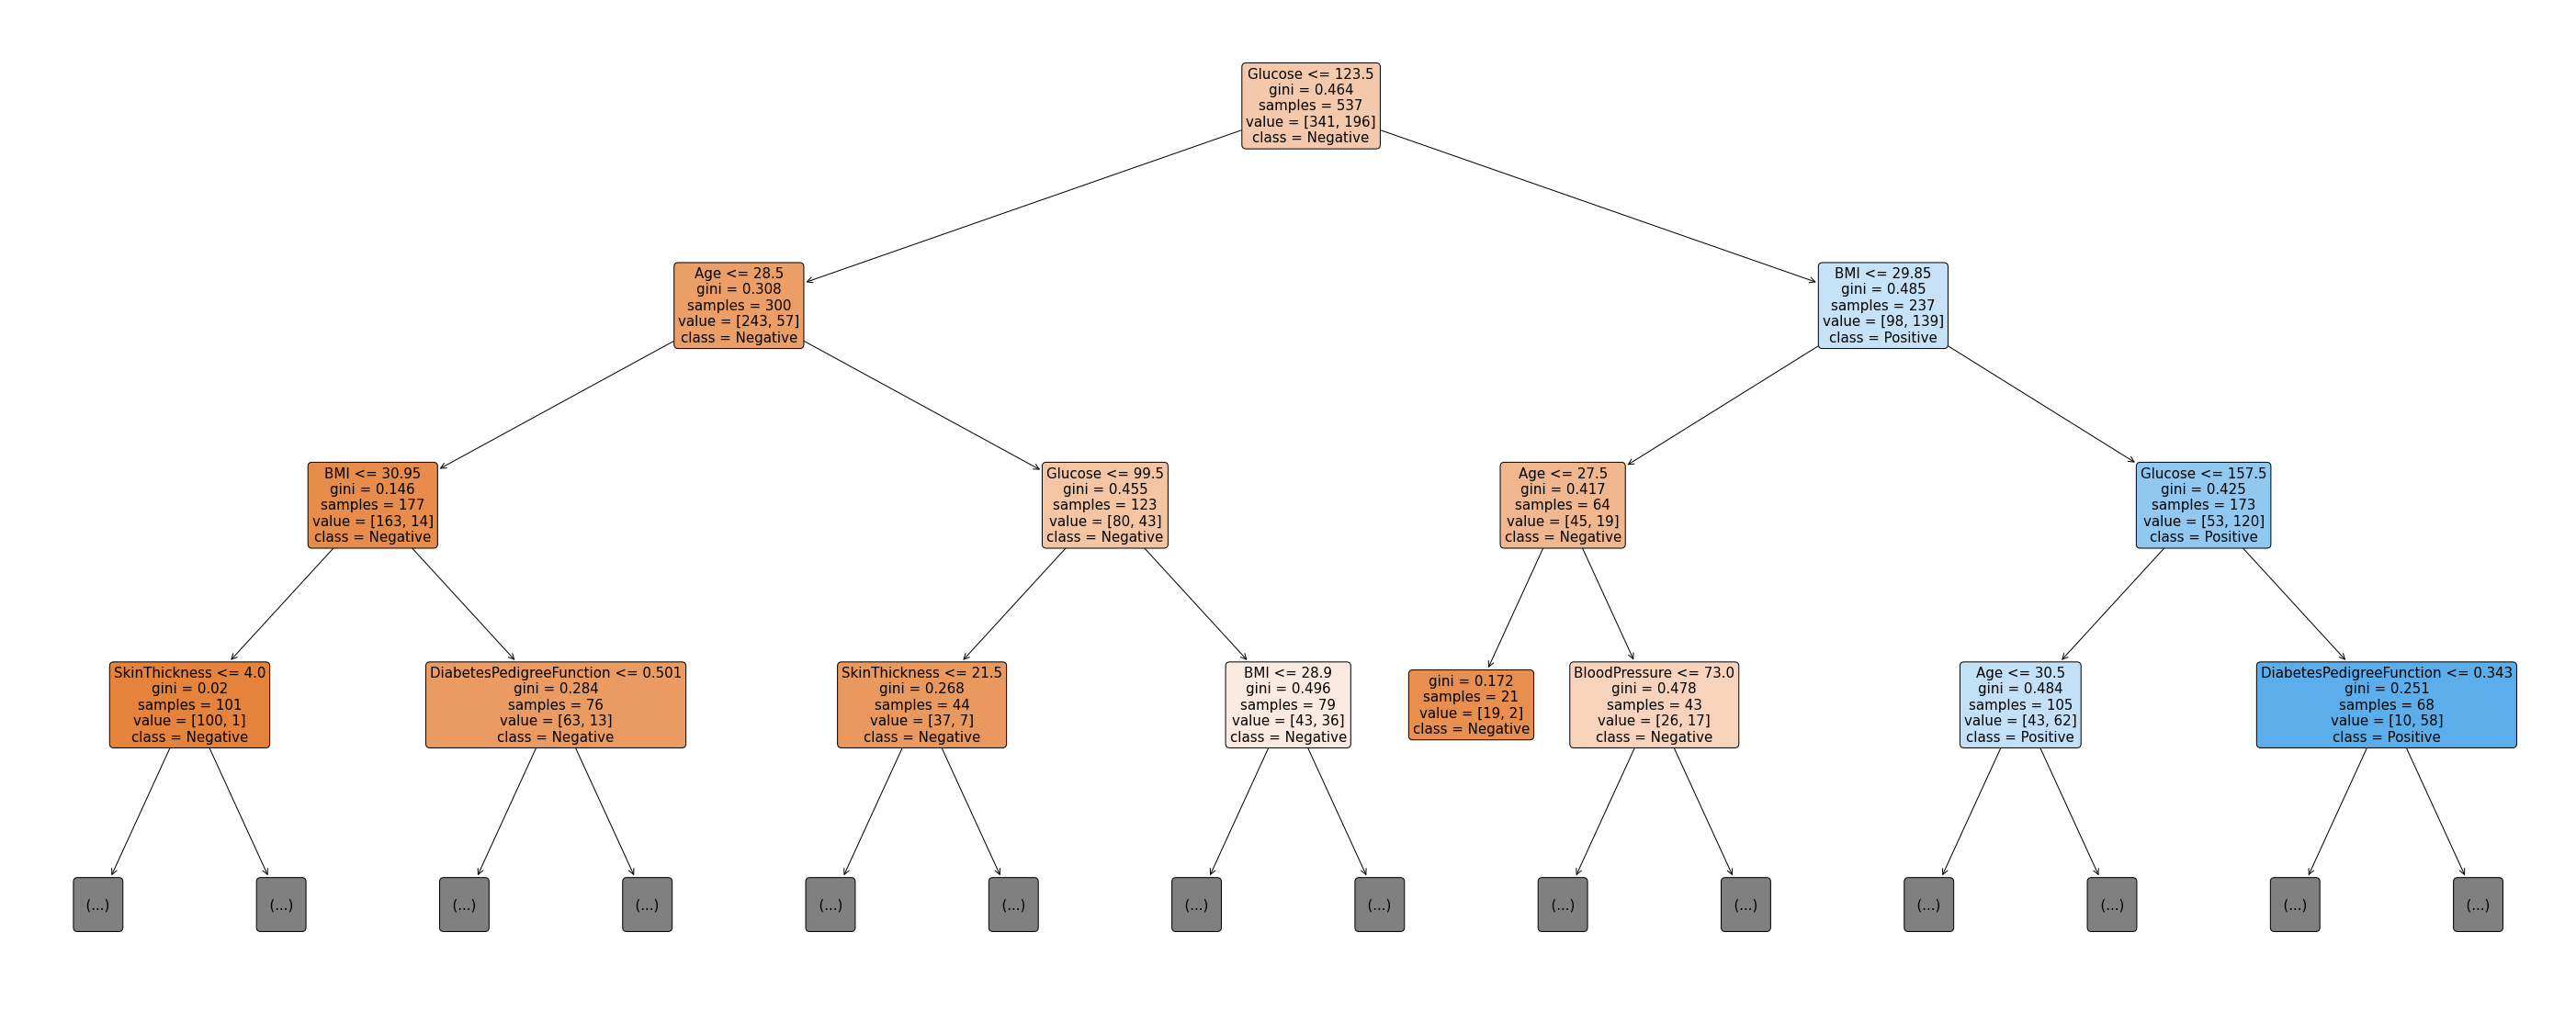

In [10]:
####################
## Your code here ##
####################
from sklearn.tree import plot_tree


plt.figure(figsize=(50, 20))
plot_tree(best_tree,
          feature_names=feature,
          class_names=['Negative', 'Positive'],
          max_depth=3,
          filled=True,
          rounded=True,
          fontsize=15)

plt.show()

* A2

> 1. If Glucose is less than equal to 123.5, <br>
>    Then the probability of being 'negative' is 81% (= 243/300). <br>
>    Else the probability of being 'positive' is 58.64% (= 139/237)

> 2. If Glucose is less than equal to 123.5 and Age is less than equal to 28.5, <br>
>    Then the probability of being 'negative' is 92.09% (= 163/177). <br>
>    Else the probability of being 'negative' is 65.04% (= 80/123)

> 3. If Glucose is greater than 123.5 and BMI is less than equal to 29.85, <br>
>    Then the probability of being 'negative' is 70.31% (= 45/64). <br>
>    Else the probability of being 'positive' is 69.36% (= 120/173)